# Notebook for subtype analysis on toy dataset 

This notebook walks through the data analysis for our data-driven subtyping approach using a toy dataset containing a sample of video-captured human motion and brain fMRI data. The code should run in less than a minute on a standard desktop computer.

## Imports

In [1]:
from utils.data_loading import load_data
from utils.subtypes import get_subtypes
from utils.plots import create_per_patient_plot_categorical, create_per_patient_plot_numerical

import random
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Directories

In [2]:
clinical_data_path = '../data/clinical_data.csv'
gait_scores_path = '../data/gait_scores.csv'
motion_encoder_dir = '../data/motion_encoder_outputs/'
fc_data_dir = '../data/fc_data/'

## Run subtyping approach on toy dataset

In [3]:
clinical_data, fmri_data, motion_encoder_outputs, fmri_corresponding_outputs, person_samples_start_ends = load_data(clinical_data_path, gait_scores_path, motion_encoder_dir, fc_data_dir, toy=True)

In [4]:
clinical_data_per_clip, cca_features = get_subtypes(clinical_data, fmri_data, motion_encoder_outputs, fmri_corresponding_outputs, person_samples_start_ends, include_clinical_subtypes=False)
clinical_data = clinical_data_per_clip.drop_duplicates(subset=['PID']).copy() # include subtypes in clinical data

## Visualize subtypes

We first visualize our subtype clustering. CCX signifies the motion component and CCY signifies the fMRI component. For CCX, each oval represents an individual as there are multiple motion features corresponding to each individual from sampling fixed size clips from the gait examinations.

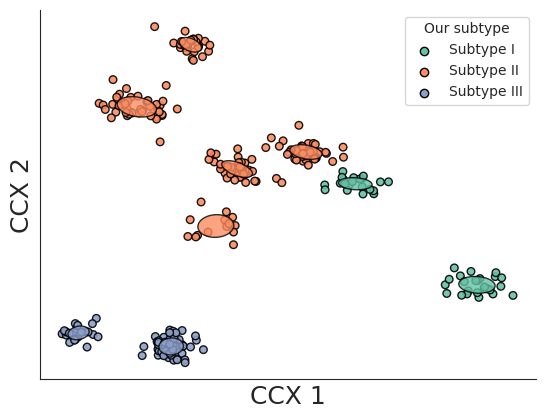

In [5]:
sns.set_style("white")

plt.rcParams['xtick.bottom'] = True
plt.rcParams['ytick.left'] = True

subtype_colorpalette = ["#66c2a5", "#fc8d62", "#8da0cb"]

ax = create_per_patient_plot_categorical(x='CCX_1', y='CCX_2', hue='Our subtype', data=clinical_data_per_clip, hue_order=[0, 1, 2], person_bounds=person_samples_start_ends, palette=subtype_colorpalette)

legend_labels = ['Subtype I', 'Subtype II', 'Subtype III']
legend = ax.legend(handles=ax.get_legend_handles_labels()[0], labels=legend_labels, title='Our subtype')

for handle in ax.get_legend().legendHandles:
    handle.set_edgecolor('black')
    handle.set_linewidth(1)
    
sns.despine(ax=ax)
ax.set_xlabel('CCX 1')
ax.xaxis.label.set_size(18)
ax.set_ylabel('CCX 2')
ax.yaxis.label.set_size(18)
ax.set_xticks([])
ax.set_yticks([])
plt.show()

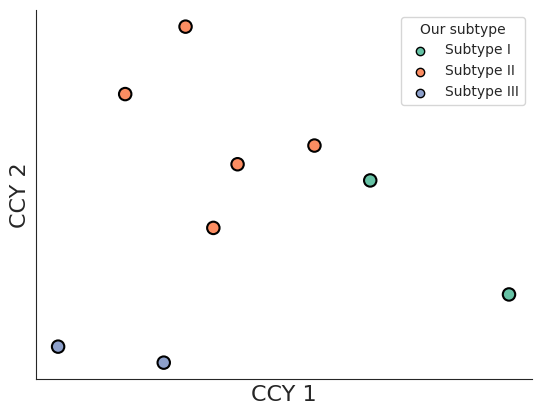

In [6]:
ax = sns.scatterplot(x='CCY_1', y='CCY_2', data=clinical_data, hue='Our subtype', palette=subtype_colorpalette, hue_order=[0, 1, 2], s=80, edgecolor='black', linewidth=1.5)


legend_labels = ['Subtype I', 'Subtype II', 'Subtype III']
legend = ax.legend(handles=ax.get_legend_handles_labels()[0], labels=legend_labels, title='Our subtype')

for handle in ax.get_legend().legendHandles:
    handle.set_edgecolor('black')
    handle.set_linewidth(1)

sns.despine(ax=ax)
ax.set_xlabel('CCY 1')
ax.xaxis.label.set_size(16)
ax.set_ylabel('CCY 2')
ax.yaxis.label.set_size(16)
ax.set_xticks([])
ax.set_yticks([])
plt.show()

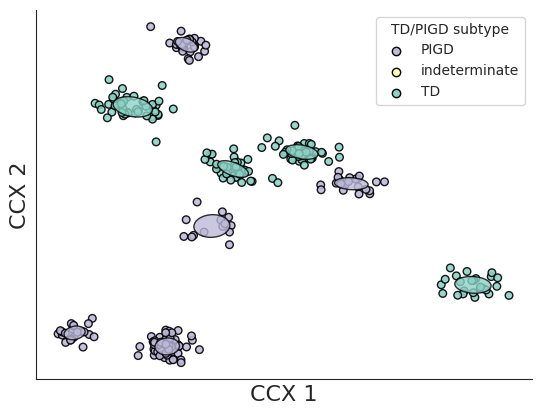

In [7]:
td_pigd_color_pallete = ['#bebada', '#ffffb3', '#8dd3c7']

ax = create_per_patient_plot_categorical(x='CCX_1', y='CCX_2', hue='TD/PIGD subtype', data=clinical_data_per_clip, hue_order=['PIGD', 'indeterminate', 'TD'], person_bounds=person_samples_start_ends, palette=td_pigd_color_pallete, alpha=0.9)

for handle in ax.get_legend().legendHandles:
    handle.set_edgecolor('black')
    handle.set_linewidth(1)

sns.despine(ax=ax)
ax.set_xlabel('CCX 1')
ax.xaxis.label.set_size(16)
ax.set_ylabel('CCX 2')
ax.yaxis.label.set_size(16)
ax.set_xticks([])
ax.set_yticks([])
plt.show()